### Importing necessary libraries

In [2]:
import numpy as np
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt; plt.rcdefaults()
import sys
import seaborn as sns

In [3]:
os.chdir("A:/")
warnings.filterwarnings("ignore")

### Loading the dataset

In [4]:
df = pd.read_csv("Sunrun_take_home.csv")

In [5]:
# Checking for Null Values
df.isnull().values.any()

False

In [6]:
df = df.rename(index=str, columns={'Meter 1 - kWh':"Home Load",'Meter 2 - kWh': "Solar Generation",
                              'Meter 3 - kWh':"Battery State Charge", 'Meter 4 - kWh':"Home Net Load"})

In [ ]:
df.head()

In [7]:
df_time = []
df_SG = []
df_HL = []
df_BSC = []
df_HNL = []
for i in range(len(df)):
    if df['Month'][i] == 1:
        df_time.append(df['Time'][i])
        df_SG.append(df['Solar Generation'][i])
        df_HL.append(df['Home Load'][i])
        df_BSC.append(df['Battery State Charge'][i])
        df_HNL.append(df['Home Net Load'][i])
    else:
            break
      
print('Janurary Data Statastics')
print()
print('Solar Generation')
print(pd.DataFrame(df_SG).describe())

print()
print('Battery State Charge')
print(pd.DataFrame(df_BSC).describe())

print()
print('Home Load')
print(pd.DataFrame(df_HL).describe())

print()
print('Home Net Load')
print(pd.DataFrame(df_HNL).describe())

Janurary Data Statastics

Solar Generation
                0
count  744.000000
mean     0.640117
std      0.938552
min      0.000000
25%      0.000000
50%      0.000000
75%      1.339085
max      3.101388

Battery State Charge
                  0
count  7.440000e+02
mean   7.440000e+00
std    6.932452e-14
min    7.440000e+00
25%    7.440000e+00
50%    7.440000e+00
75%    7.440000e+00
max    7.440000e+00

Home Load
                0
count  744.000000
mean     1.037589
std      0.318668
min      0.555657
25%      0.873132
50%      0.981148
75%      1.181222
max      1.679252

Home Net Load
                0
count  744.000000
mean     0.413474
std      1.003035
min     -2.059095
25%     -0.331815
50%      0.642856
75%      1.099875
max      1.679252


# Monthly Analysis

In [8]:
# Solar Generation Statistics
SG_sum_df_m = df.groupby('Month', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation']
SG_avg_df_m = df.groupby('Month', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation']
Cnt_Days_df_m = df.groupby('Month', as_index=False).agg({"Day": "count"})['Day']/24

# Home Load Statistics
HL_sum_df_m = df.groupby('Month', as_index=False).agg({"Home Load": "sum"})['Home Load']
HL_avg_df_m = df.groupby('Month', as_index=False).agg({"Home Load": "mean"})['Home Load']

# Battery State Charge Statistics
BSC_sum_df_m = df.groupby('Month', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge']
BSC_avg_df_m = df.groupby('Month', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge']

# Home Net Load Statistics
HNL_sum_df_m = df.groupby('Month', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load']
HNL_avg_df_m = df.groupby('Month', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load']

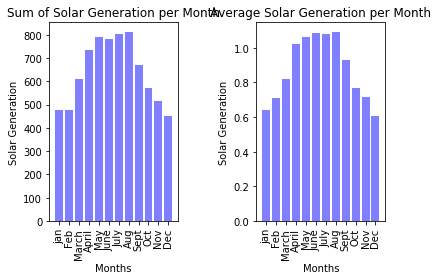

In [45]:
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, SG_sum_df_m, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Solar Generation')
plt.title('Sum of Solar Generation per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, SG_avg_df_m, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Solar Generation')
plt.title('Average Solar Generation per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()


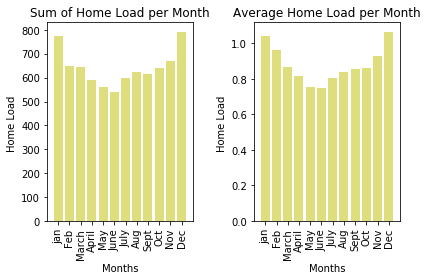

In [46]:
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, HL_sum_df_m, align='center', alpha=0.5,color='y')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Load ')
plt.title('Sum of Home Load per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, HL_avg_df_m, align='center', alpha=0.5,color='y')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Load ')
plt.title('Average Home Load per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

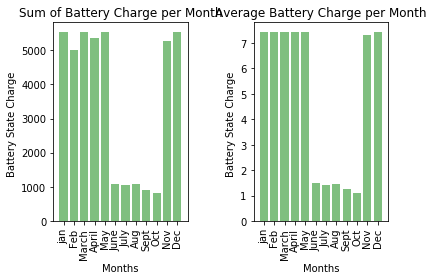

In [47]:
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, BSC_sum_df_m, align='center', alpha=0.5,color='g')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Battery State Charge ')
plt.title('Sum of Battery Charge per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, BSC_avg_df_m, align='center', alpha=0.5,color='g')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Battery State Charge ')
plt.title('Average Battery Charge per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

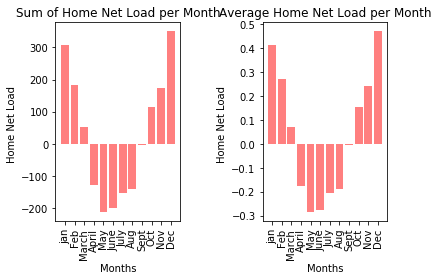

In [48]:
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, HNL_sum_df_m, align='center', alpha=0.5,color='r')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Net Load ')
plt.title('Sum of Home Net Load per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, HNL_avg_df_m, align='center', alpha=0.5,color='r')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Net Load ')
plt.title('Average Home Net Load per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

In [13]:

print('Solar Generation Statstics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'

print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,SG_sum_df_m, SG_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))

Solar Generation Statstics
Months  Sum                 Average                  Count of Day
jan     476.2473430820003   0.6401173966155919       31.0
Feb     476.5508692670004   0.7091530792663696       28.0
March   608.9019803340002   0.8184166402338713       31.0
April   734.0738207860003   1.0195469733138893       30.0
May     791.6135115210004   1.0639966552701619       31.0
June    780.8729975820005   1.0845458299750006       30.0
July    802.7749576830009   1.0789985990362916       31.0
Aug     812.4652193239999   1.092023144252688        31.0
Sept    668.4739743889997   0.9284360755402774       30.0
Oct     571.1921469069999   0.767731380251344        31.0
Nov     513.646057541       0.7133973021402777       30.0
Dec     453.16198580200046  0.6090886905940867       31.0


In [14]:
print('Home Load Statistics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'
print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,HL_sum_df_m, HL_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))

Home Load Statistics
Months  Sum                 Average                  Count of Day
jan     771.9658993270001   1.0375885743642475       31.0
Feb     647.764984644001    0.9639359890535728       28.0
March   645.5847729480009   0.8677214690161302       31.0
April   588.2660813049993   0.8170362240347212       30.0
May     559.802378652       0.7524225519516129       31.0
June    539.495533943       0.7492993526986111       30.0
July    598.7466090039995   0.8047669475860209       31.0
Aug     621.6490859790001   0.8355498467459679       31.0
Sept    617.0510399370002   0.8570153332458336       30.0
Oct     640.5808976659997   0.8609958301962362       31.0
Nov     667.7416808129999   0.9274190011291665       30.0
Dec     791.3259000289999   1.0636100806841395       31.0


In [15]:
print('Battery State Charge Statistics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'
print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,BSC_sum_df_m, BSC_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))

Battery State Charge Statistics
Months  Sum                 Average                  Count of Day
jan     5535.359999999949   7.439999999999931        31.0
Feb     4999.679999999978   7.439999999999967        28.0
March   5535.359999999949   7.439999999999931        31.0
April   5356.799999999958   7.439999999999942        30.0
May     5535.359999999949   7.439999999999931        31.0
June    1081.5557544789992  1.5021607701097213       30.0
July    1046.3489494729995  1.406382996603494        31.0
Aug     1078.1376606109998  1.4491097588857524       31.0
Sept    906.0297958130004   1.258374716406945        30.0
Oct     807.5811213759996   1.0854584964731178       31.0
Nov     5266.7218586779945  7.314891470386104        30.0
Dec     5523.117820752004   7.423545458000006        31.0


In [16]:
print('Home Net Load Statistics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'
print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,HNL_sum_df_m, HNL_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))

Home Net Load Statistics
Months  Sum                 Average                  Count of Day
jan     307.6247398310003   0.41347411267607564      31.0
Feb     183.12788709900016  0.27251173675446455      28.0
March   51.90534210699996   0.06976524476747306      31.0
April   -127.45589394499994 -0.17702207492361102     30.0
May     -212.0207950870001  -0.2849741869448926      31.0
June    -199.1118597800002  -0.27654424969444474     30.0
July    -152.33570379000017 -0.2047522900403228      31.0
Aug     -138.89554006399987 -0.1866875538494622      31.0
Sept    -4.187210659999983  -0.005815570361111087    30.0
Oct     113.93991751700004  0.15314505042607532      31.0
Nov     174.79237836799982  0.24276719217777754      30.0
Dec     349.49296387999976  0.4697486073655911       31.0


# Daily Analysis

In [17]:
df_Jan = df[df.Month==1]
df_Feb = df[df.Month==2]
df_Mar = df[df.Month==3]
df_Apr = df[df.Month==4]
df_May = df[df.Month==5]
df_Jun = df[df.Month==6]
df_Jul = df[df.Month==7]
df_Aug = df[df.Month==8]
df_Sep = df[df.Month==9]
df_Oct = df[df.Month==10]
df_Nov = df[df.Month==11]
df_Dec = df[df.Month==12]

In [19]:
# Monthly Statistics
SG_sum_df_d = []
SG_avg_df_d = []
SG_sum_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Feb.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Mar.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Apr.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_May.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Jun.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Jul.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Aug.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Sep.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Oct.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Nov.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation'],
                   df_Dec.groupby('Day', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation']
                   ])
SG_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Feb.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Mar.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Apr.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_May.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Jun.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Jul.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Aug.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Sep.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Oct.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Nov.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Dec.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation']
                   ])

HL_sum_df_d = []
HL_avg_df_d = []
# Home Load Statistics
HL_sum_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Feb.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Mar.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Apr.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_May.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Jun.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Jul.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Aug.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Sep.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Oct.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Nov.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load'],
                   df_Dec.groupby('Day', as_index=False).agg({"Home Load": "sum"})['Home Load']
                   ])
HL_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Feb.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Mar.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Apr.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_May.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Jun.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Jul.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Aug.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Sep.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Oct.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Nov.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Dec.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load']
                   ])

BSC_sum_df_d = []
BSC_avg_df_d = []
# Battery State Charge Statistics
BSC_sum_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Feb.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Mar.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Apr.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_May.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Jun.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Jul.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Aug.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Sep.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Oct.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Nov.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge'],
                     df_Dec.groupby('Day', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge']
                    ])
BSC_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Feb.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Mar.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Apr.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_May.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Jun.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Jul.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Aug.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Sep.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Oct.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Nov.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Dec.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge']
                    ])

HNL_sum_df_d = []
HNL_avg_df_d = []
# Home Net Load Statistics
HNL_sum_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Feb.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Mar.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Apr.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_May.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Jun.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Jul.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Aug.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Sep.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Oct.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load'],
                     df_Nov.groupby('Day', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load']
                    ])
                     
HNL_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Feb.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Mar.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Apr.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_May.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Jun.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Jul.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Aug.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Sep.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Oct.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Nov.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Dec.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load']
                    ])

Average Solar Generation Output


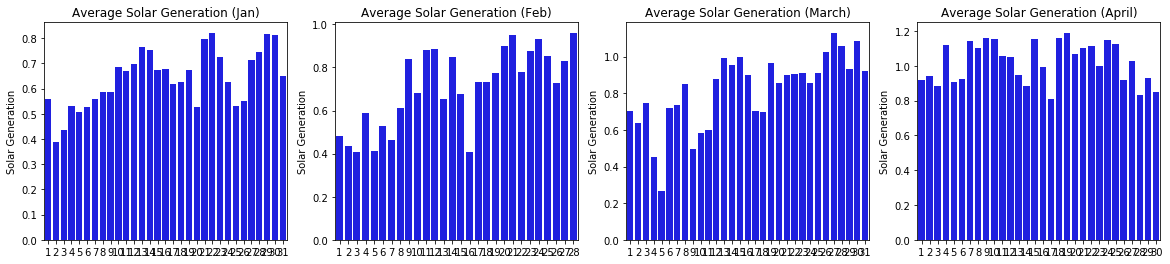

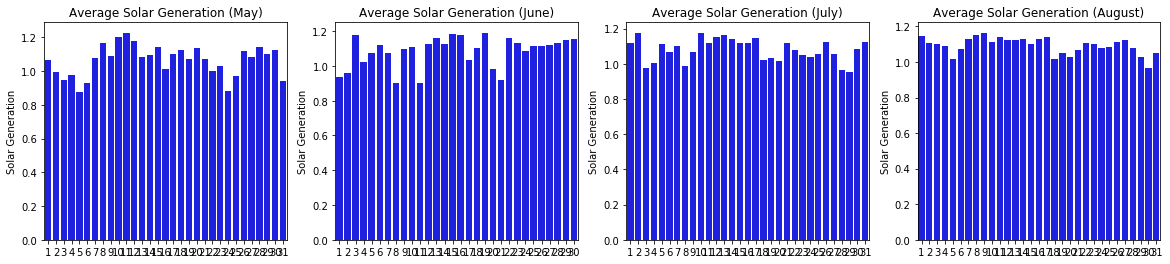

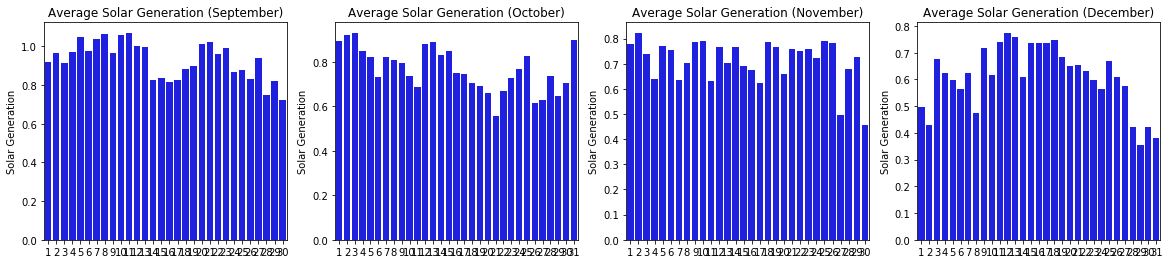

In [31]:
print('Average Solar Generation Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=SG_avg_df_d[-1][0], ax=axes[0],color='b')
axes[0].set_title('Average Solar Generation (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=SG_avg_df_d[-1][1], ax=axes[1],color='b')
axes[1].set_title('Average Solar Generation (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=SG_avg_df_d[-1][2], ax=axes[2],color='b')
axes[2].set_title('Average Solar Generation (March)')

sns.barplot(x=df_Apr.Day.unique(), y=SG_avg_df_d[-1][3], ax=axes[3],color='b')
axes[3].set_title('Average Solar Generation (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=SG_avg_df_d[-1][4], ax=axes[0],color='b')
axes[0].set_title('Average Solar Generation (May)')

sns.barplot(x=df_Jun.Day.unique(), y=SG_avg_df_d[-1][5], ax=axes[1],color='b')
axes[1].set_title('Average Solar Generation (June)')

sns.barplot(x=df_Jul.Day.unique(), y=SG_avg_df_d[-1][6], ax=axes[2],color='b')
axes[2].set_title('Average Solar Generation (July)')

sns.barplot(x=df_Aug.Day.unique(), y=SG_avg_df_d[-1][7], ax=axes[3],color='b')
axes[3].set_title('Average Solar Generation (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=SG_avg_df_d[-1][8], ax=axes[0],color='b')
axes[0].set_title('Average Solar Generation (September)')

sns.barplot(x=df_Oct.Day.unique(), y=SG_avg_df_d[-1][9], ax=axes[1],color='b')
axes[1].set_title('Average Solar Generation (October)')

sns.barplot(x=df_Nov.Day.unique(), y=SG_avg_df_d[-1][10], ax=axes[2],color='b')
axes[2].set_title('Average Solar Generation (November)')

sns.barplot(x=df_Dec.Day.unique(), y=SG_avg_df_d[-1][11], ax=axes[3],color='b')
axes[3].set_title('Average Solar Generation (December)')


plt.show()

Average Home Load Output


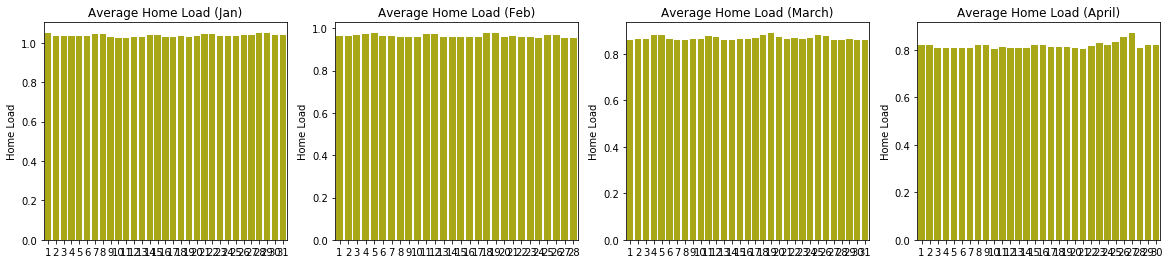

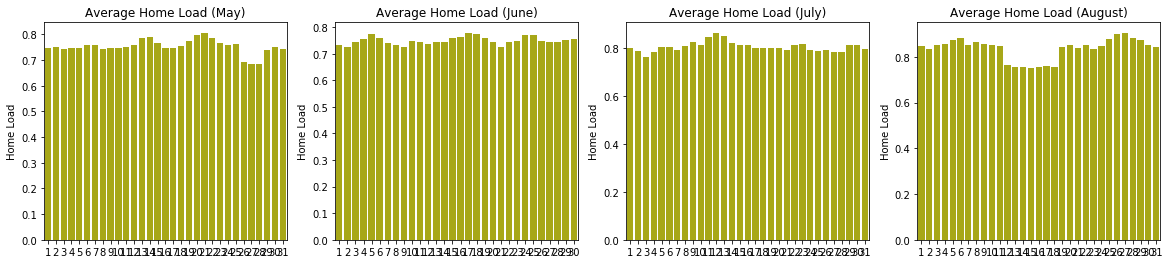

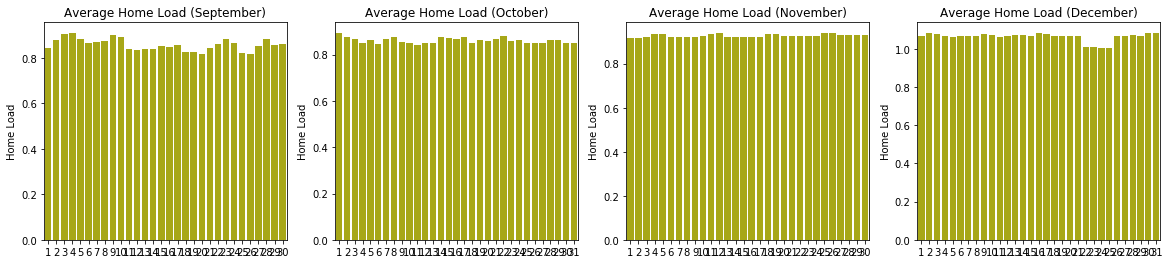

In [30]:
print('Average Home Load Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=HL_avg_df_d[-1][0], ax=axes[0],color='y')
axes[0].set_title('Average Home Load (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=HL_avg_df_d[-1][1], ax=axes[1],color='y')
axes[1].set_title('Average Home Load (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=HL_avg_df_d[-1][2], ax=axes[2],color='y')
axes[2].set_title('Average Home Load (March)')

sns.barplot(x=df_Apr.Day.unique(), y=HL_avg_df_d[-1][3], ax=axes[3],color='y')
axes[3].set_title('Average Home Load (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=HL_avg_df_d[-1][4], ax=axes[0],color='y')
axes[0].set_title('Average Home Load (May)')

sns.barplot(x=df_Jun.Day.unique(), y=HL_avg_df_d[-1][5], ax=axes[1],color='y')
axes[1].set_title('Average Home Load (June)')

sns.barplot(x=df_Jul.Day.unique(), y=HL_avg_df_d[-1][6], ax=axes[2],color='y')
axes[2].set_title('Average Home Load (July)')

sns.barplot(x=df_Aug.Day.unique(), y=HL_avg_df_d[-1][7], ax=axes[3],color='y')
axes[3].set_title('Average Home Load (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=HL_avg_df_d[-1][8], ax=axes[0],color='y')
axes[0].set_title('Average Home Load (September)')

sns.barplot(x=df_Oct.Day.unique(), y=HL_avg_df_d[-1][9], ax=axes[1],color='y')
axes[1].set_title('Average Home Load (October)')

sns.barplot(x=df_Nov.Day.unique(), y=HL_avg_df_d[-1][10], ax=axes[2],color='y')
axes[2].set_title('Average Home Load (November)')

sns.barplot(x=df_Dec.Day.unique(), y=HL_avg_df_d[-1][11], ax=axes[3],color='y')
axes[3].set_title('Average Home Load (December)')


plt.show()

Average Battery State Charge Output


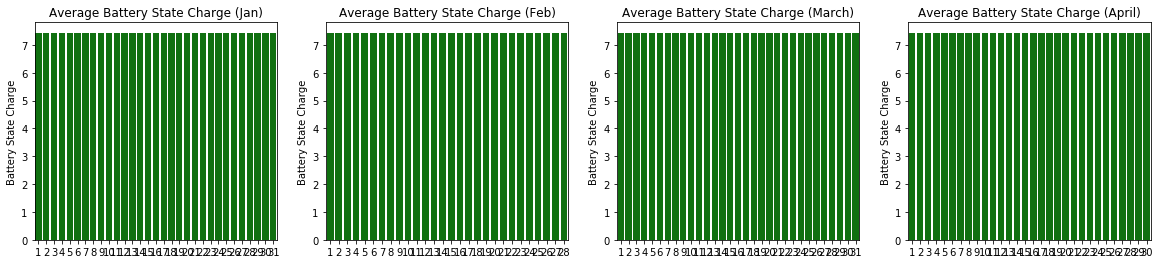

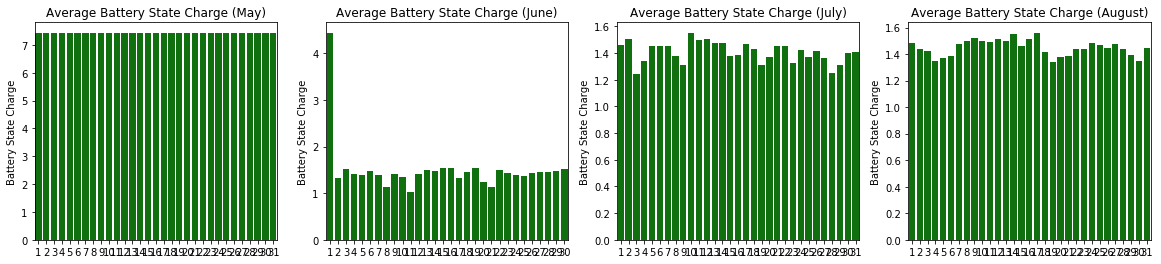

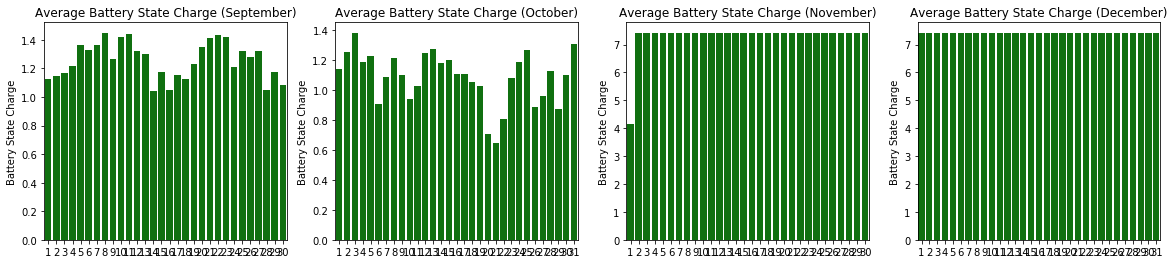

In [32]:
print('Average Battery State Charge Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=BSC_avg_df_d[-1][0], ax=axes[0],color='g')
axes[0].set_title('Average Battery State Charge (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=BSC_avg_df_d[-1][1], ax=axes[1],color='g')
axes[1].set_title('Average Battery State Charge (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=BSC_avg_df_d[-1][2], ax=axes[2],color='g')
axes[2].set_title('Average Battery State Charge (March)')

sns.barplot(x=df_Apr.Day.unique(), y=BSC_avg_df_d[-1][3], ax=axes[3],color='g')
axes[3].set_title('Average Battery State Charge (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=BSC_avg_df_d[-1][4], ax=axes[0],color='g')
axes[0].set_title('Average Battery State Charge (May)')

sns.barplot(x=df_Jun.Day.unique(), y=BSC_avg_df_d[-1][5], ax=axes[1],color='g')
axes[1].set_title('Average Battery State Charge (June)')

sns.barplot(x=df_Jul.Day.unique(), y=BSC_avg_df_d[-1][6], ax=axes[2],color='g')
axes[2].set_title('Average Battery State Charge (July)')

sns.barplot(x=df_Aug.Day.unique(), y=BSC_avg_df_d[-1][7], ax=axes[3],color='g')
axes[3].set_title('Average Battery State Charge (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=BSC_avg_df_d[-1][8], ax=axes[0],color='g')
axes[0].set_title('Average Battery State Charge (September)')

sns.barplot(x=df_Oct.Day.unique(), y=BSC_avg_df_d[-1][9], ax=axes[1],color='g')
axes[1].set_title('Average Battery State Charge (October)')

sns.barplot(x=df_Nov.Day.unique(), y=BSC_avg_df_d[-1][10], ax=axes[2],color='g')
axes[2].set_title('Average Battery State Charge (November)')

sns.barplot(x=df_Dec.Day.unique(), y=BSC_avg_df_d[-1][11], ax=axes[3],color='g')
axes[3].set_title('Average Battery State Charge (December)')


plt.show()

Average Home Net Load Output


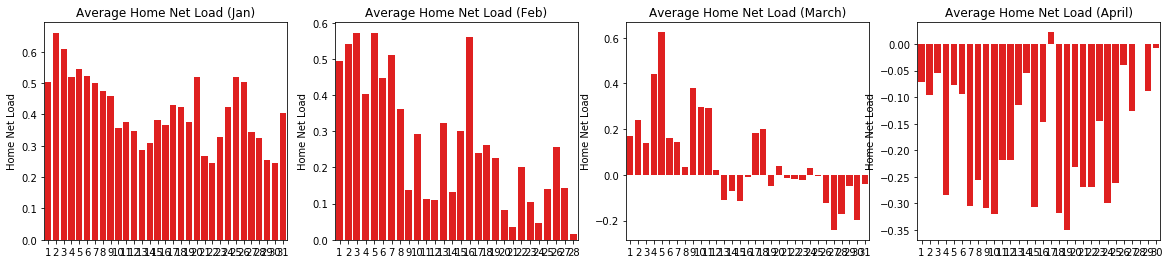

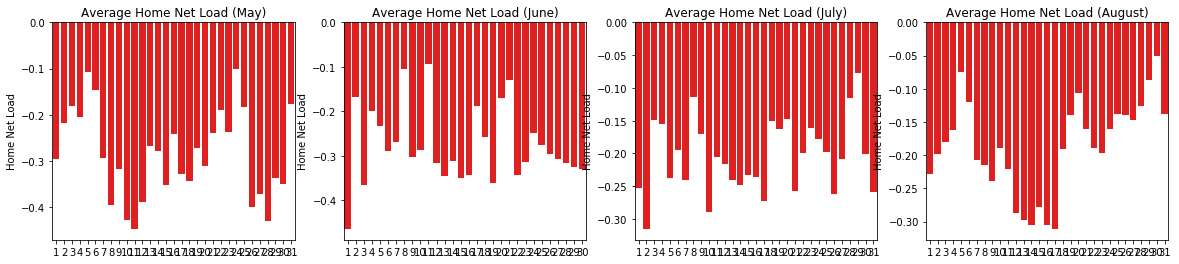

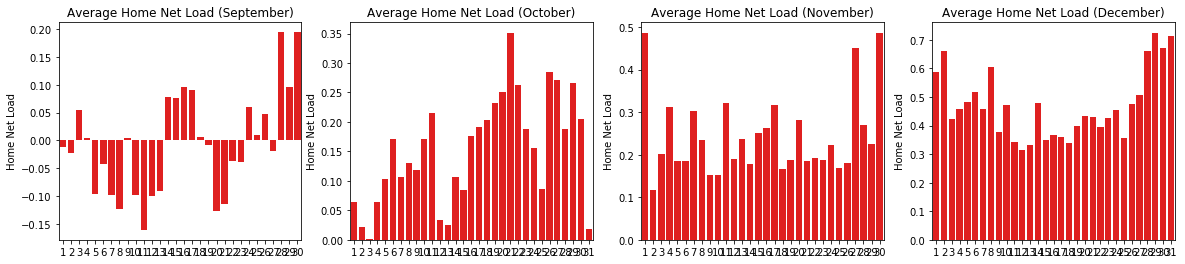

In [33]:
print('Average Home Net Load Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=HNL_avg_df_d[-1][0], ax=axes[0],color='r')
axes[0].set_title('Average Home Net Load (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=HNL_avg_df_d[-1][1], ax=axes[1],color='r')
axes[1].set_title('Average Home Net Load (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=HNL_avg_df_d[-1][2], ax=axes[2],color='r')
axes[2].set_title('Average Home Net Load (March)')

sns.barplot(x=df_Apr.Day.unique(), y=HNL_avg_df_d[-1][3], ax=axes[3],color='r')
axes[3].set_title('Average Home Net Load (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=HNL_avg_df_d[-1][4], ax=axes[0],color='r')
axes[0].set_title('Average Home Net Load (May)')

sns.barplot(x=df_Jun.Day.unique(), y=HNL_avg_df_d[-1][5], ax=axes[1],color='r')
axes[1].set_title('Average Home Net Load (June)')

sns.barplot(x=df_Jul.Day.unique(), y=HNL_avg_df_d[-1][6], ax=axes[2],color='r')
axes[2].set_title('Average Home Net Load (July)')

sns.barplot(x=df_Aug.Day.unique(), y=HNL_avg_df_d[-1][7], ax=axes[3],color='r')
axes[3].set_title('Average Home Net Load (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=HNL_avg_df_d[-1][8], ax=axes[0],color='r')
axes[0].set_title('Average Home Net Load (September)')

sns.barplot(x=df_Oct.Day.unique(), y=HNL_avg_df_d[-1][9], ax=axes[1],color='r')
axes[1].set_title('Average Home Net Load (October)')

sns.barplot(x=df_Nov.Day.unique(), y=HNL_avg_df_d[-1][10], ax=axes[2],color='r')
axes[2].set_title('Average Home Net Load (November)')

sns.barplot(x=df_Dec.Day.unique(), y=HNL_avg_df_d[-1][11], ax=axes[3],color='r')
axes[3].set_title('Average Home Net Load (December)')


plt.show()

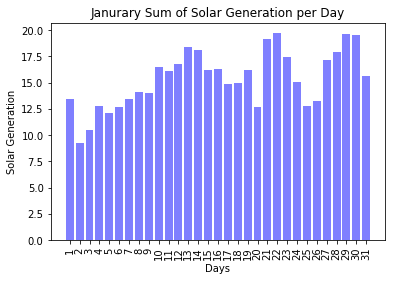

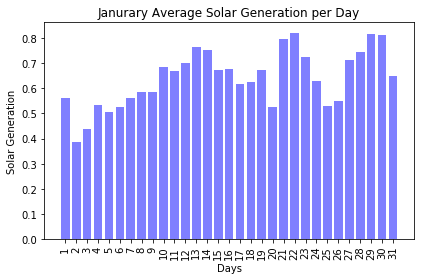

In [36]:
y_pos = np.arange(len(df_Jan.Day.unique()))


plt.bar(y_pos, SG_sum_df_d[-1][0], align='center', alpha=0.5,color='b')
plt.xticks(y_pos, df_Jan.Day.unique(), rotation = 90)
plt.xlabel('Days')
plt.ylabel('Solar Generation')
plt.title('Janurary Sum of Solar Generation per Day')
plt.show()

plt.bar(y_pos, SG_avg_df_d[-1][0], align='center', alpha=0.5,color='b')
plt.xticks(y_pos, df_Jan.Day.unique(), rotation = 90)
plt.xlabel('Days')
plt.ylabel('Solar Generation')
plt.title('Janurary Average Solar Generation per Day')
plt.tight_layout()

plt.show()

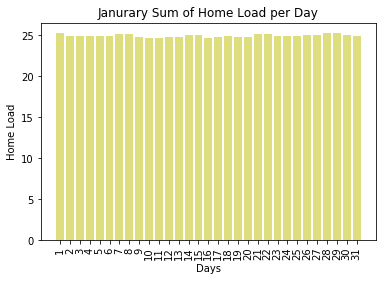

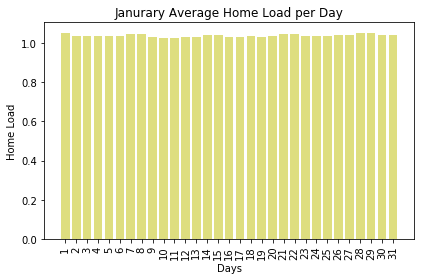

In [37]:
y_pos = np.arange(len(df_Jan.Day.unique()))

plt.bar(y_pos, HL_sum_df_d[-1][0], align='center', alpha=0.5,color='y')
plt.xticks(y_pos, df_Jan.Day.unique(),rotation = 90)
plt.xlabel('Days')
plt.ylabel('Home Load')
plt.title('Janurary Sum of Home Load per Day')
plt.show()
plt.bar(y_pos, HL_avg_df_d[-1][0], align='center', alpha=0.5,color='y')
plt.xticks(y_pos, df_Jan.Day.unique(), rotation = 90)
plt.xlabel('Days')
plt.ylabel('Home Load')
plt.title('Janurary Average Home Load per Day')
plt.tight_layout()
plt.show()

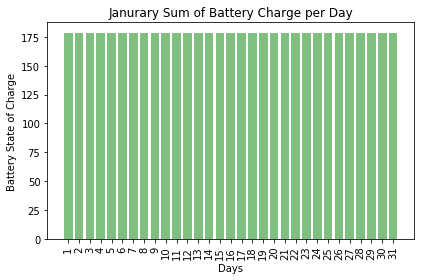

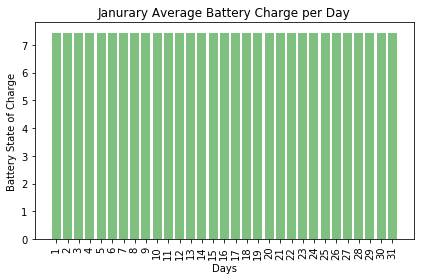

In [38]:
y_pos = np.arange(len(df_Jan.Day.unique()))


plt.bar(y_pos, BSC_sum_df_d[-1][0], align='center', alpha=0.5,color='g')
plt.xticks(y_pos, df_Jan.Day.unique(), rotation = 90)
plt.xlabel('Days')
plt.ylabel('Battery State of Charge')
plt.title('Janurary Sum of Battery Charge per Day')
plt.tight_layout()
plt.show()

plt.bar(y_pos, BSC_avg_df_d[-1][0], align='center', alpha=0.5,color='g')
plt.xticks(y_pos, df_Jan.Day.unique(), rotation=90)
plt.xlabel('Days')
plt.ylabel('Battery State of Charge')
plt.title('Janurary Average Battery Charge per Day')
plt.tight_layout()


plt.show()

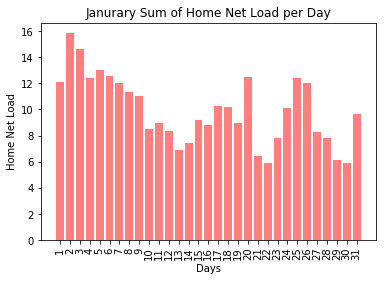

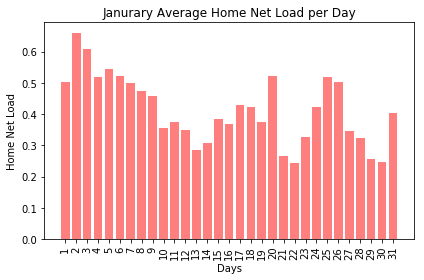

In [39]:
y_pos = np.arange(len(df_Jan.Day.unique()))


plt.bar(y_pos, HNL_sum_df_d[-1][0], align='center', alpha=0.5,color='r')
plt.xticks(y_pos,df_Jan.Day.unique(),rotation=90)
plt.xlabel('Days')
plt.ylabel('Home Net Load')
plt.title('Janurary Sum of Home Net Load per Day')
plt.show()

plt.bar(y_pos, HNL_avg_df_d[-1][0], align='center', alpha=0.5,color='r')
plt.xticks(y_pos, df_Jan.Day.unique(),rotation=90)
plt.xlabel('Days')
plt.ylabel('Home Net Load')
plt.title('Janurary Average Home Net Load per Day')
plt.tight_layout()


plt.show()

# Hourly Analysis

Text(0, 0.5, 'Solar Generation')

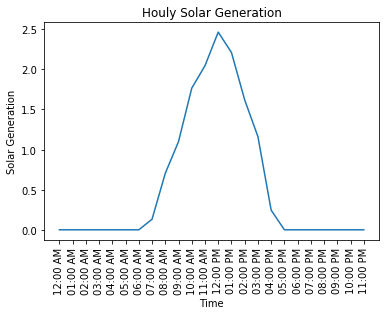

In [40]:
df_Time = []
df_SG_h = []
for i in range(len(df)):
    if df['Day'][i] == 1 and df['Month'][i] == 1:
        df_Time.append(df['Time'][i])
        df_SG_h.append(df['Solar Generation'][i])
    else:
            break
plt.plot(df_Time,df_SG_h)
plt.title('Houly Solar Generation')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Solar Generation')


In [41]:
SG_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Solar Generation": "mean"})['Solar Generation']
HL_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Home Load": "mean"})['Home Load']
BSC_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Battery State Charge": "mean"})['Battery State Charge']
HNL_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Home Net Load": "mean"})['Home Net Load']

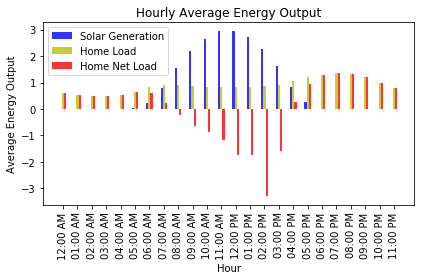

In [42]:
# data to plot
n_groups = len(df_Time)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, SG_Time_avg, bar_width,
alpha=opacity,
color='b',
label='Solar Generation')
 
rects2 = plt.bar(index + bar_width, HL_Time_avg, bar_width,
alpha=opacity,
color='y',
label='Home Load')

rects3 = plt.bar(index + (bar_width * 2), HNL_Time_avg, bar_width,
alpha=opacity,
color='r',
label='Home Net Load')
 
plt.xlabel('Hour')
plt.ylabel('Average Energy Output')
plt.title('Hourly Average Energy Output')
plt.xticks(index + bar_width, (df_Time),rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

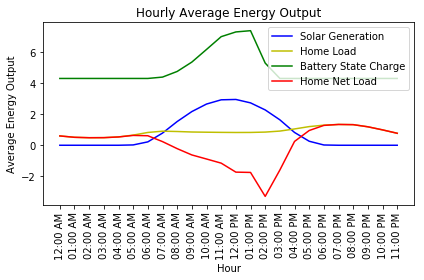

In [43]:
# create plot

plt.plot(df_Time, SG_Time_avg,color='b')
plt.plot(df_Time, HL_Time_avg,color='y')
plt.plot(df_Time, BSC_Time_avg,color='g')
plt.plot(df_Time, HNL_Time_avg,color='r')
 
plt.xlabel('Hour')
plt.ylabel('Average Energy Output')
plt.title('Hourly Average Energy Output')
plt.xticks(rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()